In [1]:
import sys
from pathlib import Path

# Go two levels up to reach project root
project_root = Path.cwd().parents[1]  # from subfolder/ to notebook_folder/ to project_root/
scripts_path = project_root / "scripts"

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from scripts.general_scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.general_scripts.pipelines import price_model
from scripts.general_scripts.predict import future_price_prediction
from scripts.general_scripts.lstm import LSTMModelMultiStep, LSTMModelMultiOutput
from scripts.general_scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
scaler = StandardScaler()
model_type = LSTMModelMultiOutput
criterion = CustomizedLoss()
n_lags = 5
n_forecast = 2
seasonal_periods = 261

Seasonality Strength: 0.12


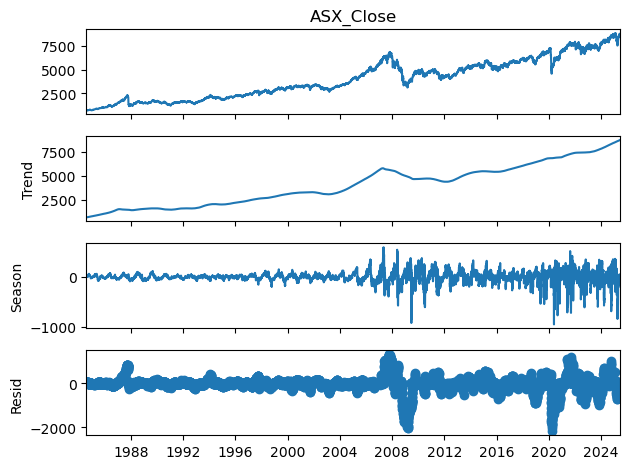

<Figure size 1200x400 with 0 Axes>

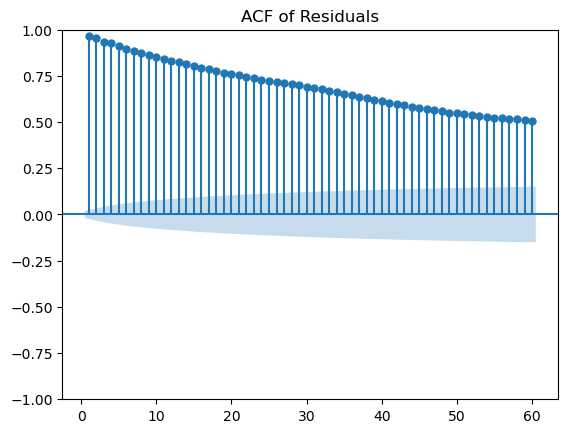

In [4]:
# 📂 Load dataset
file_path_1 = "../../ready_data/asx_data/cleaned_asx_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1, seasonal_periods, 'stl')

In [5]:
df_1

,ASX_Close,trend,seasonal,residual,dow_sin,dow_cos,month_sin,month_cos
Date,,,,,,,,
1984-08-03,713.000000,654.904502,19.337425,38.758073,-0.433884,-0.900969,-0.5,-0.866025
1984-08-06,736.799988,655.994122,33.293578,47.512288,0.000000,1.000000,-0.5,-0.866025
1984-08-07,728.500000,657.084066,26.568094,44.847840,0.781831,0.623490,-0.5,-0.866025
1984-08-08,728.500000,658.174336,29.201483,41.124182,0.974928,-0.222521,-0.5,-0.866025
1984-08-15,735.099976,659.264932,34.670124,41.164920,0.974928,-0.222521,-0.5,-0.866025
...,...,...,...,...,...,...,...,...
2025-06-02,8637.500000,8667.372708,-9.914008,-19.958700,0.000000,1.000000,0.5,-0.866025
2025-06-03,8690.900391,8669.778599,19.140465,1.981327,0.781831,0.623490,0.5,-0.866025
2025-06-04,8770.200195,8672.183962,53.532109,44.484124,0.974928,-0.222521,0.5,-0.866025


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

10322    8773.8107
dtype: float64
Hello
10322    3.296441
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

10322    8676.993644
dtype: float64
[DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-06 00:00:00
(10318, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.2205 - Val Loss: 0.0046
Test Loss: 0.0027
10322    8740.313408
dtype: float64
Date
2025-06-06    8741.900393
dtype: float64
(1,)
1 1 1
RMSE: 1.5870, MAE: 1.5870, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


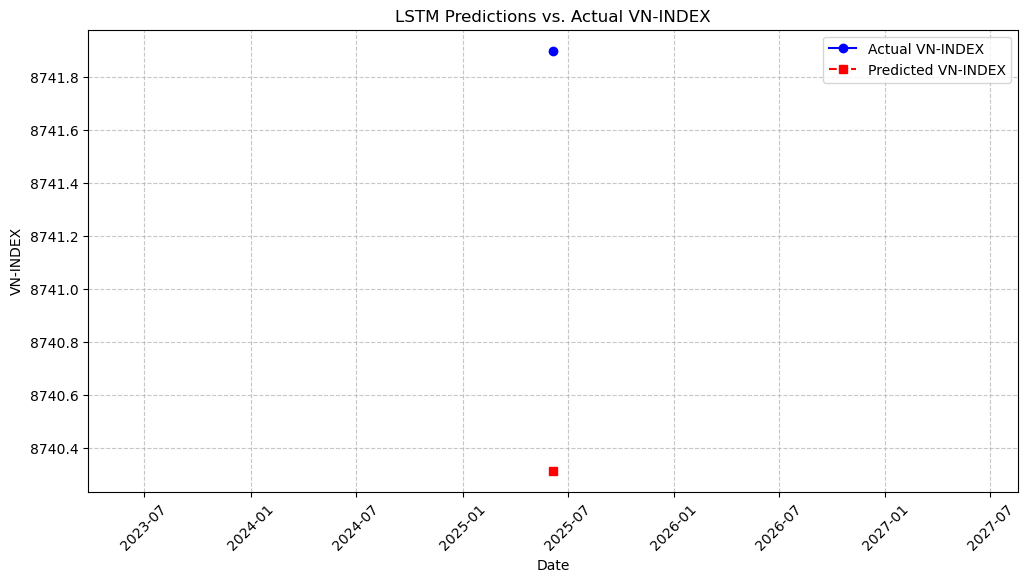

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-06      8741.900393         8740.313408


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

10321    8766.415003
dtype: float64
Hello
10321    14.53576
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


10321    8674.589326
dtype: float64
[DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-05 00:00:00
(10317, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.2072 - Val Loss: 0.0083
Test Loss: 0.0053
10321    8732.041666
dtype: float64
Date
2025-06-05    8768.599606
dtype: float64
(1,)
1 1 1
RMSE: 36.5579, MAE: 36.5579, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


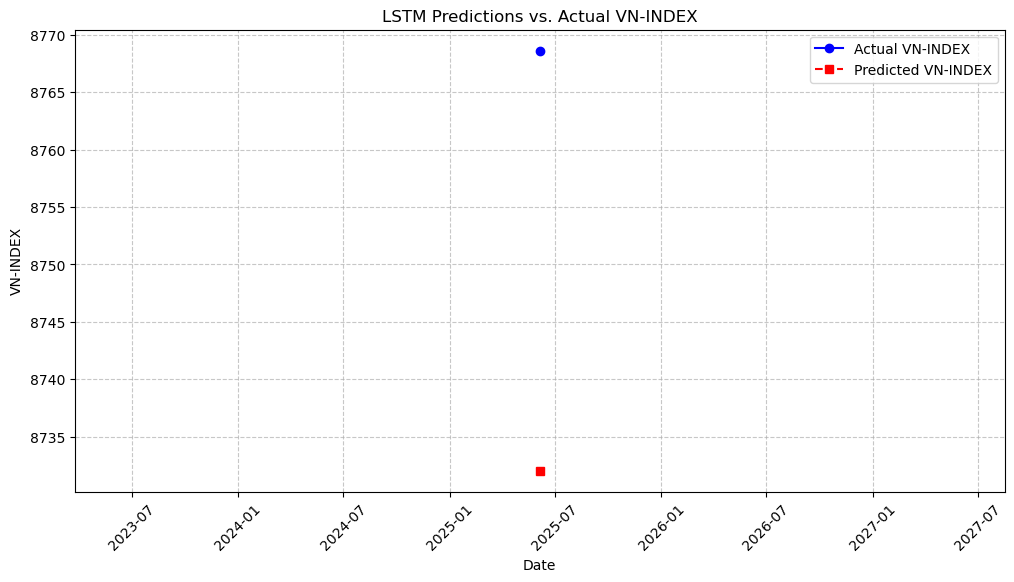

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-05      8768.599606         8732.041666


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

10320    8710.716756
dtype: float64
Hello
10320    67.733738
dtype: float64
10320    8672.184489
dtype: float64
[DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-04 00:00:00
(10316, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.1803 - Val Loss: 0.0006
Test Loss: 0.0090
10320    8743.713796
dtype: float64
Date
2025-06-04    8770.200195
dtype: float64
(1,)
1 1 1
RMSE: 26.4864, MAE: 26.4864, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


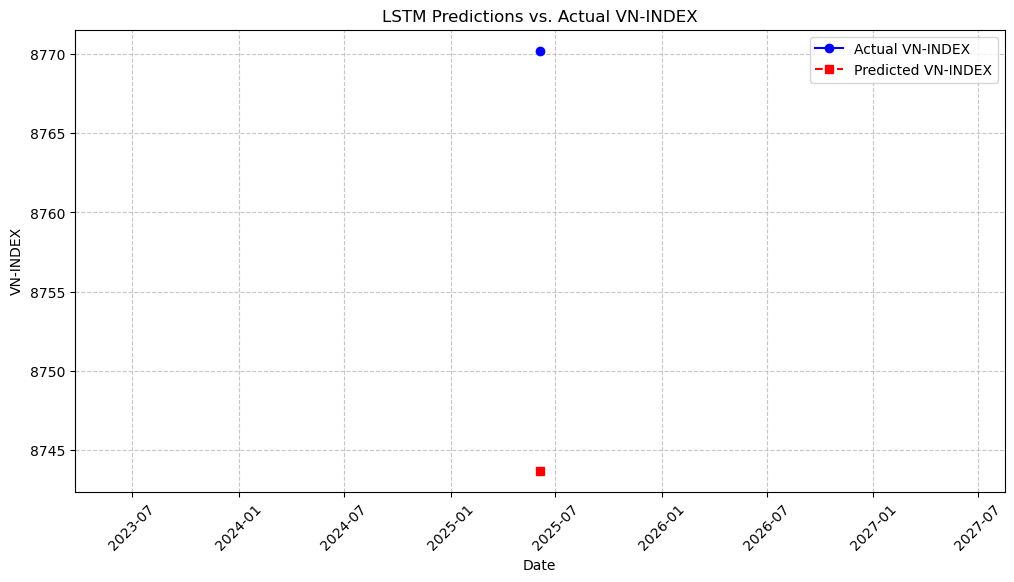

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-04      8770.200195         8743.713796


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

10319    8643.347733
dtype: float64
Hello
10319    44.408662
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

10319    8669.77913
dtype: float64
[DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-03 00:00:00
(10315, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.2077 - Val Loss: 0.0006
Test Loss: 0.0012
10319    8701.412688
dtype: float64
Date
2025-06-03    8690.900389
dtype: float64
(1,)
1 1 1
RMSE: 10.5123, MAE: 10.5123, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


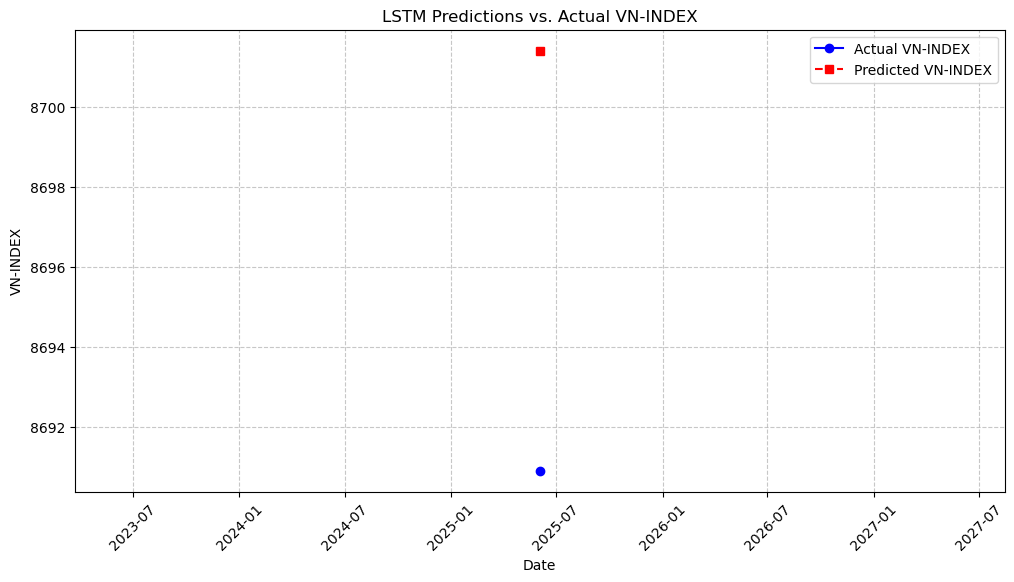

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03      8690.900389         8701.412688


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

10318    8659.749032
dtype: float64
Hello
10318    9.6867
dtype: float64
10318    8667.373243
dtype: float64
[DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-02 00:00:00
(10314, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.2118 - Val Loss: 0.0001
Test Loss: 0.0005
10318    8667.004282
dtype: float64
Date
2025-06-02    8637.5
dtype: float64
(1,)
1 1 1
RMSE: 29.5043, MAE: 29.5043, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


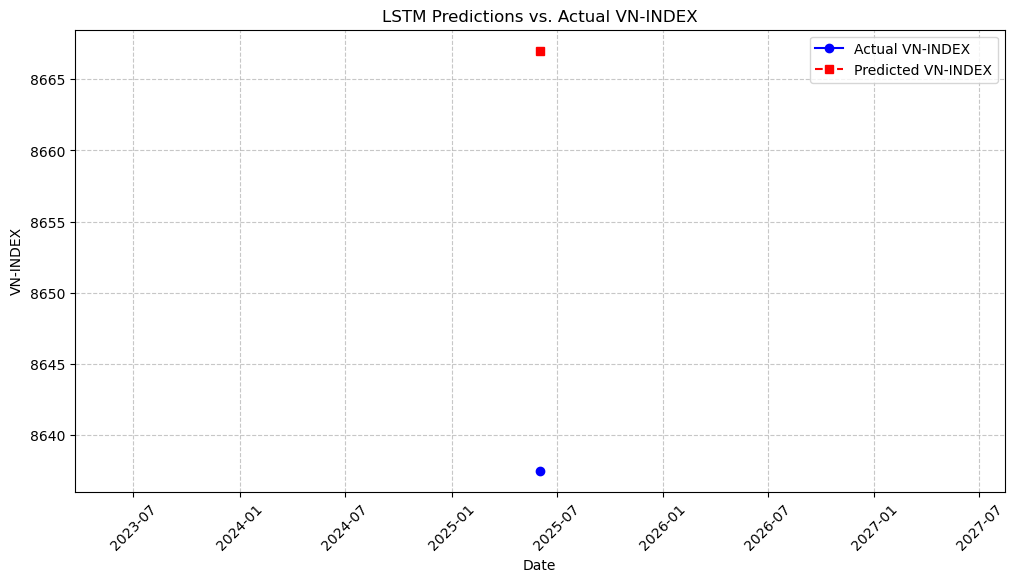

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-02           8637.5         8667.004282


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

10321    8766.415003
10322    8776.544156
dtype: float64
Hello
10321    14.535760
10322     1.109716
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

10321    8674.589326
10322    8676.994690
dtype: float64
[DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05', '2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-06 0

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.7019 - Val Loss: 0.1167
Test Loss: 0.0028
10321    8730.943606
10322    8718.472853
dtype: float64
Date
2025-06-05    8768.599606
2025-06-06    8741.900389
dtype: float64
(2,)
2 2 2
RMSE: 31.3594, MAE: 30.5418, R²: -4.5182, Directional Accuracy: 1.0000


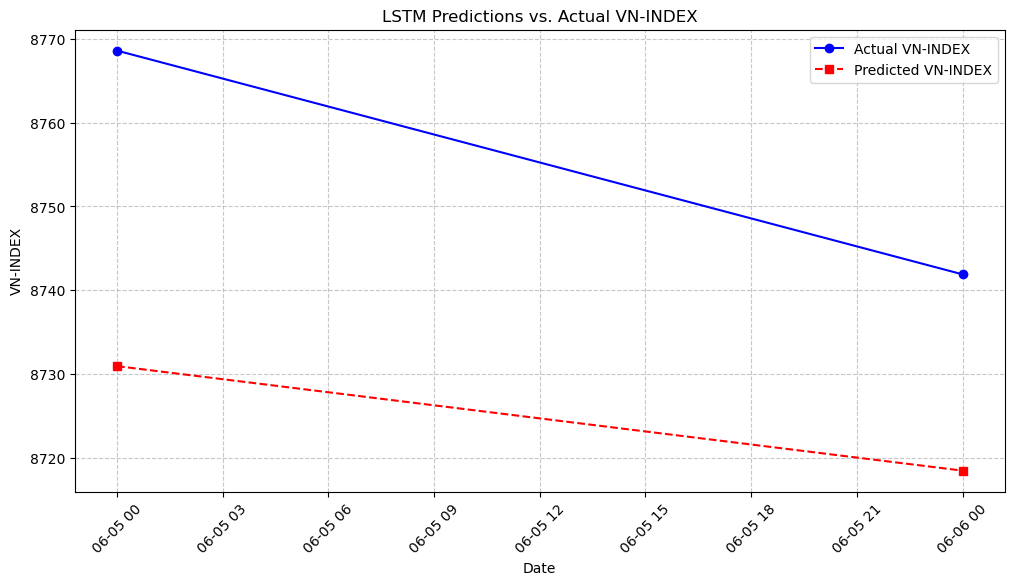

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-05      8768.599606         8730.943606
1 2025-06-06      8741.900389         8718.472853


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

10319    8643.347733
10320    8661.347814
dtype: float64
Hello
10319    44.408662
10320    77.985406
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

10319    8669.779130
10320    8672.185552
dtype: float64
[DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-04 0

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.6754 - Val Loss: 0.1008
Test Loss: 0.1094
10319    8705.723505
10320    8736.736074
dtype: float64
Date
2025-06-03    8690.900389
2025-06-04    8770.200191
dtype: float64
(2,)
2 2 2
RMSE: 25.8802, MAE: 24.1436, R²: 0.5740, Directional Accuracy: 1.0000


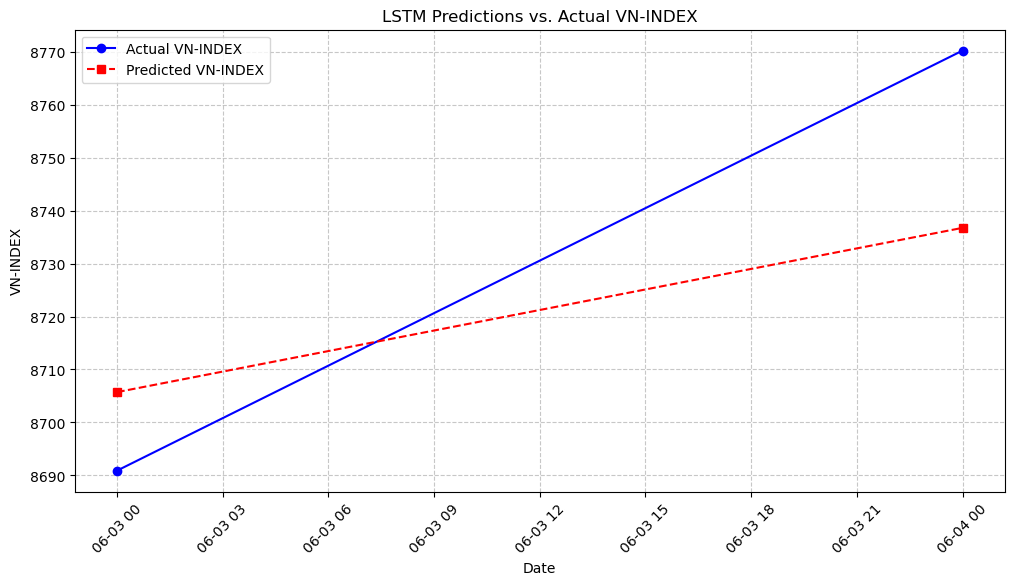

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03      8690.900389         8705.723505
1 2025-06-04      8770.200191         8736.736074


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

10317    8653.133556
10318    8653.682381
dtype: float64
Hello
10317    39.549696
10318    19.902754
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


10317    8664.966825
10318    8667.374321
dtype: float64
[DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-02 0

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.6538 - Val Loss: 0.1008
Test Loss: 0.0002
10317    8692.092200
10318    8673.186726
dtype: float64
Date
2025-05-30    8660.299805
2025-06-02    8637.500000
dtype: float64
(2,)
2 2 2
RMSE: 33.7957, MAE: 33.7396, R²: -7.7886, Directional Accuracy: 1.0000


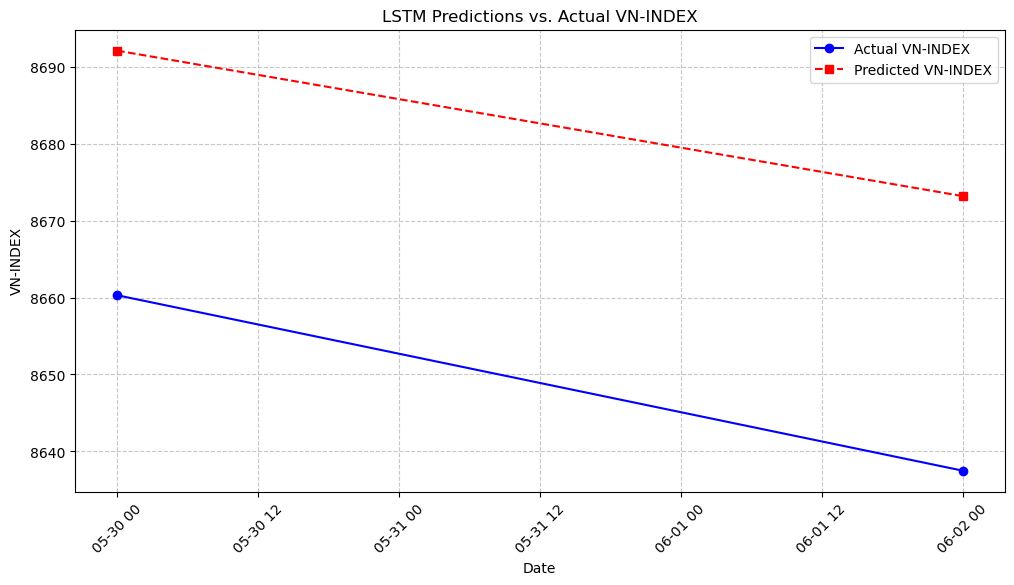

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-30      8660.299805         8692.092200
1 2025-06-02      8637.500000         8673.186726


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

10315    8646.427548
10316    8627.779307
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

10315    15.940009
10316    29.969324
dtype: float64
10315    8660.152379
10316    8662.560965
dtype: float64
[DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='d

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.7072 - Val Loss: 0.0034
Test Loss: 0.1083
10315    8685.207691
10316    8701.207741
dtype: float64
Date
2025-05-28    8624.900390
2025-05-29    8637.799804
dtype: float64
(2,)
2 2 2
RMSE: 61.8770, MAE: 61.8576, R²: -91.0405, Directional Accuracy: 1.0000


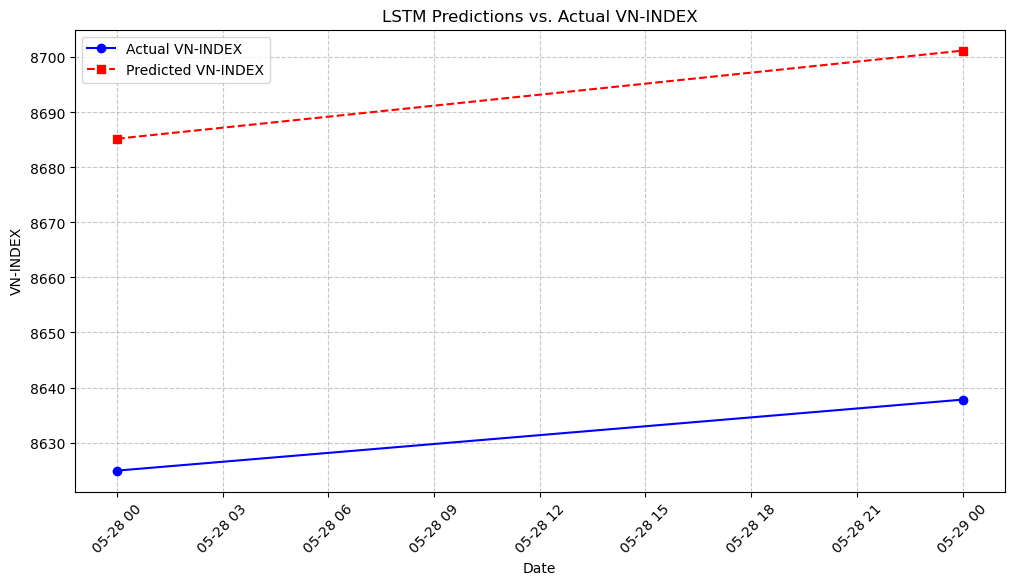

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-28      8624.900390         8685.207691
1 2025-05-29      8637.799804         8701.207741


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base

10313    8579.670038
10314    8572.688771
dtype: float64
Hello
10313   -26.798549
10314     5.443250
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

10313    8655.335761
10314    8657.745452
dtype: float64
[DatetimeIndex(['2025-05-13', '2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14', '2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-27 0

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.7093 - Val Loss: 0.1099
Test Loss: 0.1061
10313    8599.425928
10314    8633.346406
dtype: float64
Date
2025-05-26    8588.799805
2025-05-27    8631.499998
dtype: float64
(2,)
2 2 2
RMSE: 7.6264, MAE: 6.2363, R²: 0.8724, Directional Accuracy: 1.0000


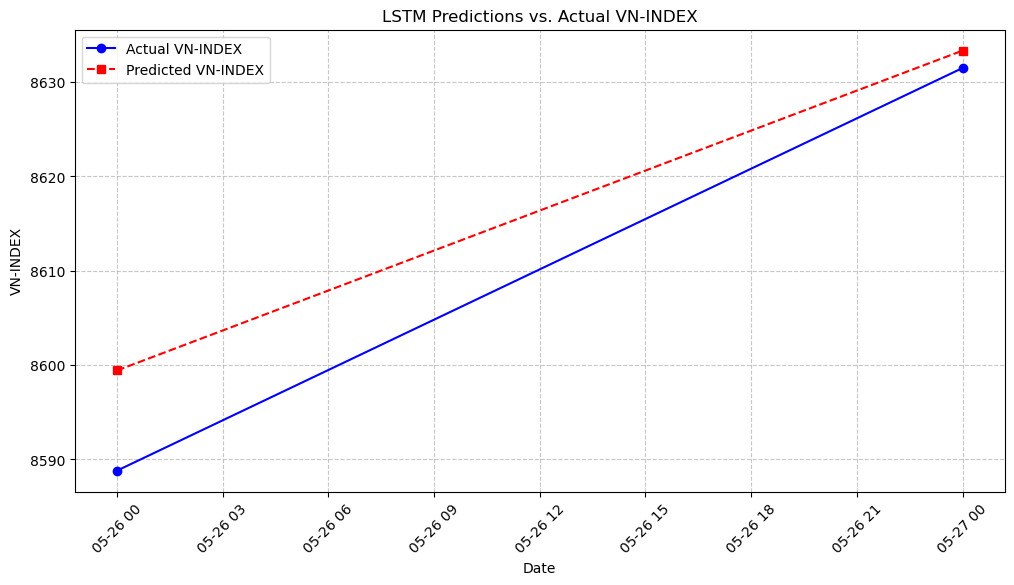

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-26      8588.799805         8599.425928
1 2025-05-27      8631.499998         8633.346406


In [6]:
for n_forecast in range(1,3):
    for i in range(5):
        baseline = ExponentialSmoothing(
        df_1['ASX_Close'].iloc[:-n_forecast*(i+1)],
        trend='add',            # additive trend
        seasonal='add',         # additive seasonality
        seasonal_periods=seasonal_periods
        ).fit()

        # 2) Forecast the next day (one‐step ahead):
        price_forecast = baseline.forecast(n_forecast)

        # 3) If you want to extract the trend/seasonal forecasts separately:
        fitted_components = baseline.fittedvalues  # this is price = level+trend+seasonal
        level = baseline.level                     # the “smoothed level” ≈ trend
        seasonal = baseline.season                 # the seasonal factors

        print(price_forecast)

        data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]

        if i:
            data = data.iloc[:-n_forecast*i]
        # 🚀 Train the model and get the test set
        model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecast, seasonal_periods=seasonal_periods, epochs=50)

Hello
10321    14.535760
10322     1.109716
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

10321    8674.589326
10322    8676.994690
dtype: float64
[DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04', '2025-06-05'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-05', '2025-06-06'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-06 0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.7019 - Val Loss: 0.1167
Test Loss: 0.0028
10321    8730.943606
10322    8718.472853
dtype: float64
Date
2025-06-05    8768.599606
2025-06-06    8741.900389
dtype: float64
(2,)
2 2 2
RMSE: 31.3594, MAE: 30.5418, R²: -4.5182, Directional Accuracy: 1.0000


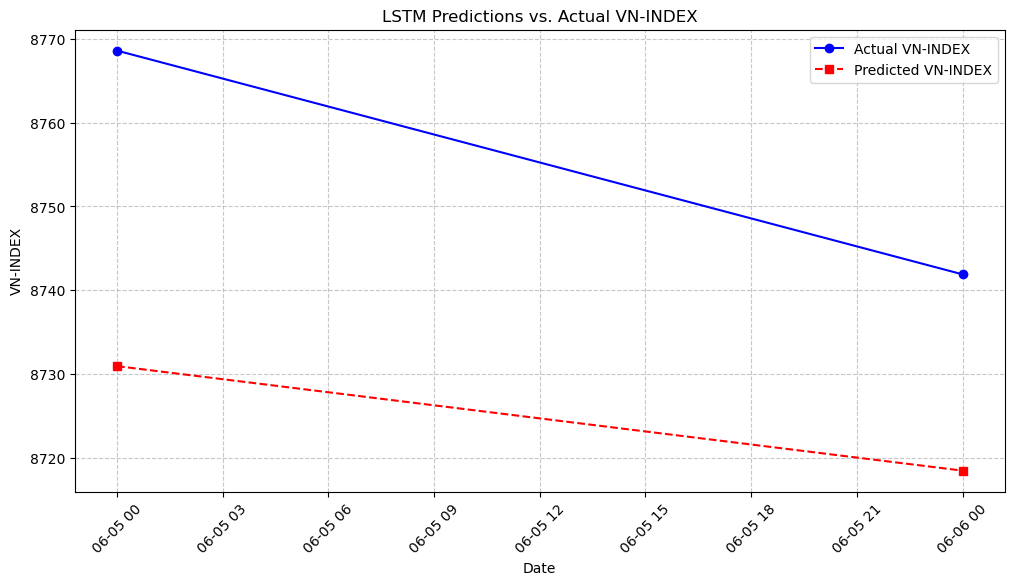

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-05      8768.599606         8730.943606
1 2025-06-06      8741.900389         8718.472853
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

10323    8679.397447
10324    8681.801768
dtype: float64
10323    8654.308109
10324    8609.172998
dtype: float64


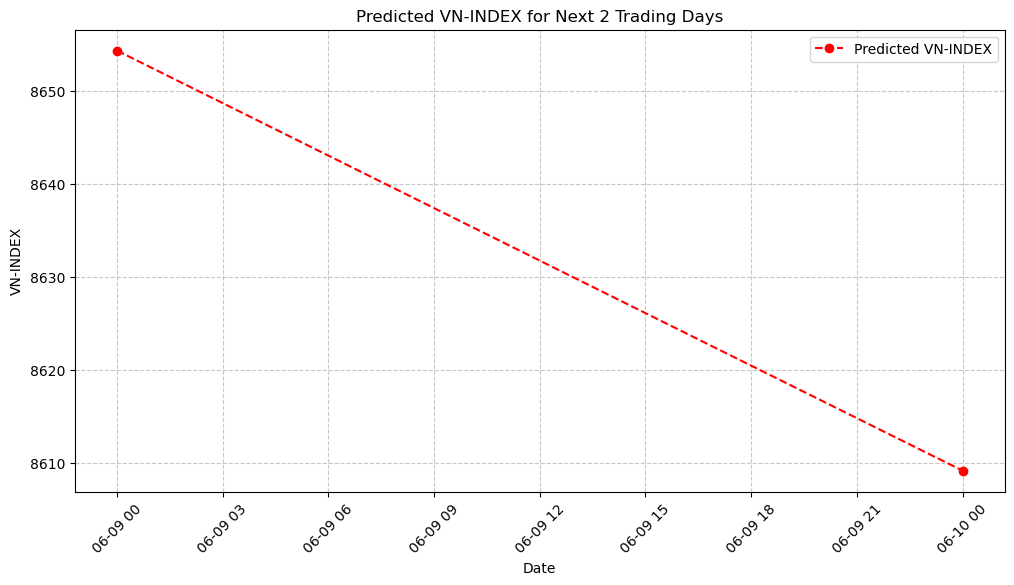

Date
2025-06-05    8768.599609
2025-06-06    8741.900391
dtype: float64


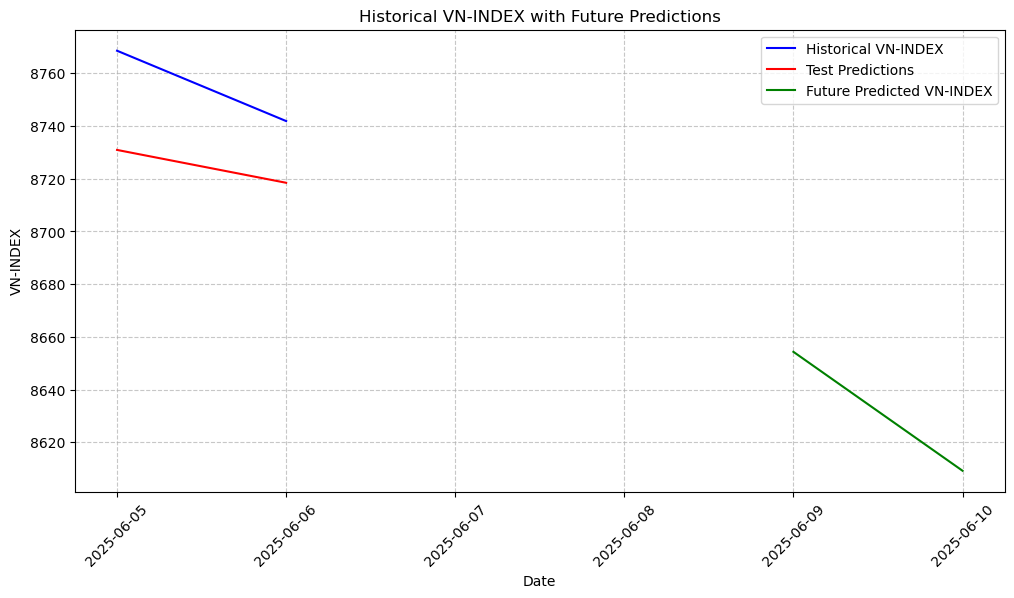

            Date  Predicted VN-INDEX
10323 2025-06-09         8654.308109
10324 2025-06-10         8609.172998


In [7]:
data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]
# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecast, seasonal_periods=seasonal_periods, epochs=50)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast, seasonal_periods=seasonal_periods)